In [5]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
df=pd.read_csv('melbourne_housing.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [8]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

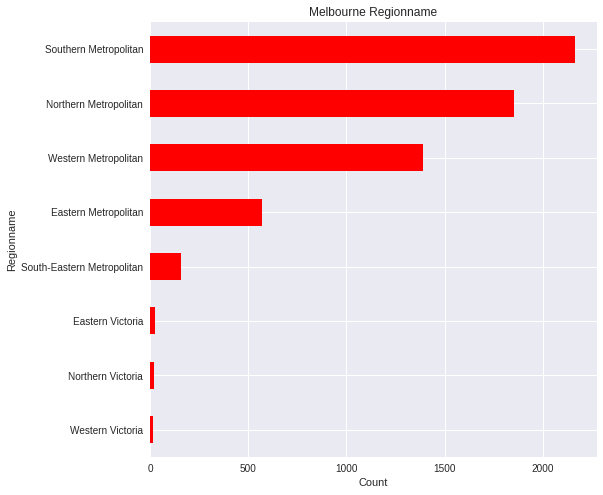

In [12]:
plt.figure(figsize=(8,8))
df['Regionname'][0:8000].value_counts().sort_values().plot(kind='barh',color='red')
plt.xlabel("Count")
plt.ylabel("Regionname")
plt.title("Melbourne Regionname")
plt.rcParams.update({'font.size':5})
plt.show()

/home/rorremous/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rorremous/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rorremous/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rorremous/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rorremous/.local/lib/python3.10/site-packages/seaborn/categori

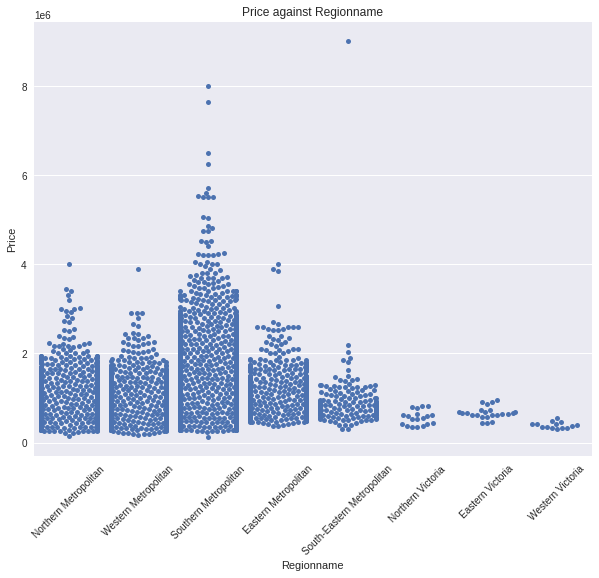

In [13]:
plt.figure(figsize=(10,8))
chart=sns.swarmplot(data=df, x='Regionname', y='Price')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Price against Regionname")
plt.show()

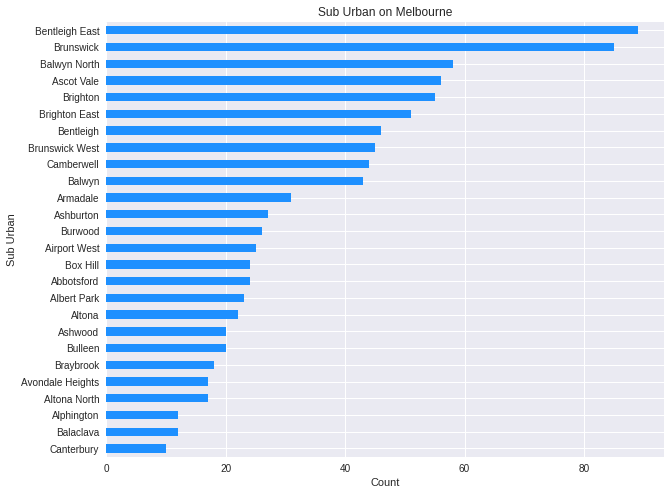

In [14]:
plt.figure(figsize = (10,8))
df['Suburb'][0:900].value_counts().sort_values().plot(kind = 'barh', color = 'dodgerblue')
plt.xlabel("Count")
plt.ylabel("Sub Urban")
plt.title("Sub Urban on Melbourne")
plt.rcParams.update({'font.size': 5})
plt.show()

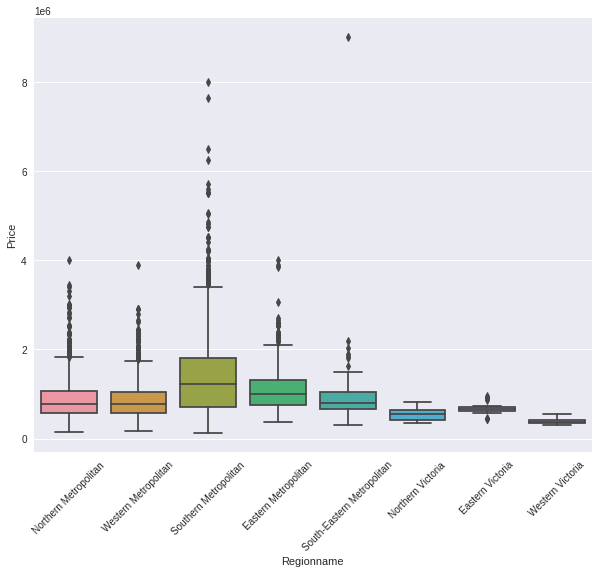

In [15]:
plt.figure(figsize=(10,8))
chart=sns.boxplot(data=df, x='Regionname', y='Price')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

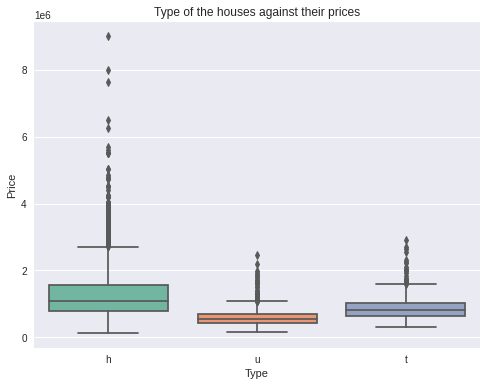

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Type', y='Price', palette='Set2')
plt.title("Type of the houses against their prices")
plt.show()

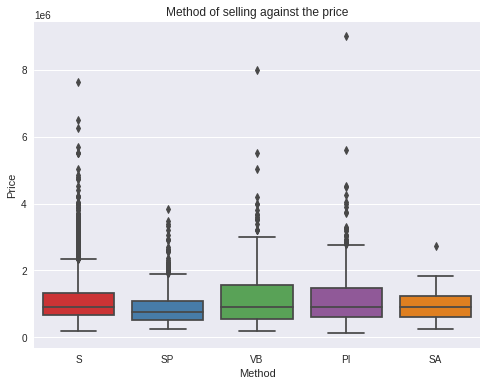

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Method', y='Price', palette='Set1')
plt.title("Method of selling against the price")
plt.show()

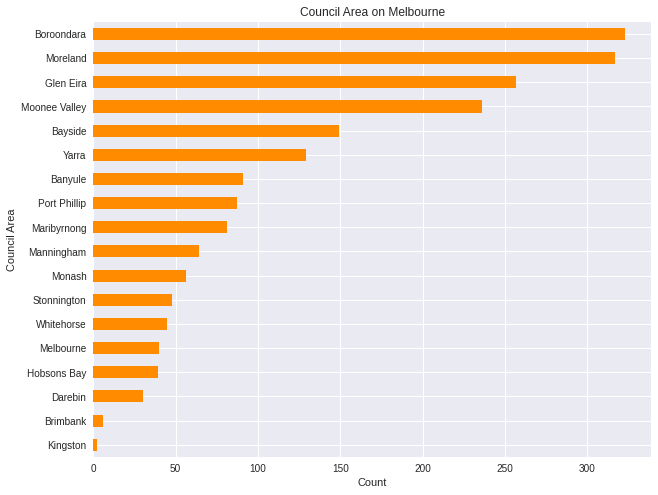

In [18]:
plt.figure(figsize = (10,8))
df['CouncilArea'][0:2000].value_counts().sort_values().plot(kind = 'barh', color = 'darkorange')
plt.xlabel("Count")
plt.ylabel("Council Area")
plt.title("Council Area on Melbourne")
plt.rcParams.update({'font.size': 5})
plt.show()

In [19]:
first_column=df.pop('Price')
df.insert(0, 'Price', first_column)
for i in df.columns.tolist():
    df[i]=df[i].astype('category').cat.codes

df.head()

,Price,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,839,0,2790,1,0,1,18,41,12,50,...,0,0,110,85,23,29,1712,1839,2,135
2,1118,0,4520,2,0,3,18,42,12,50,...,1,0,88,224,23,29,1690,1854,2,135
4,1174,0,4882,3,0,4,112,43,12,50,...,0,2,74,212,130,29,1722,1851,2,135
6,1291,0,1027,2,0,1,112,47,12,50,...,1,0,198,313,32,29,1788,1932,2,135
7,1193,0,6101,1,0,1,112,48,12,50,...,0,2,209,143,17,29,1737,1869,2,135


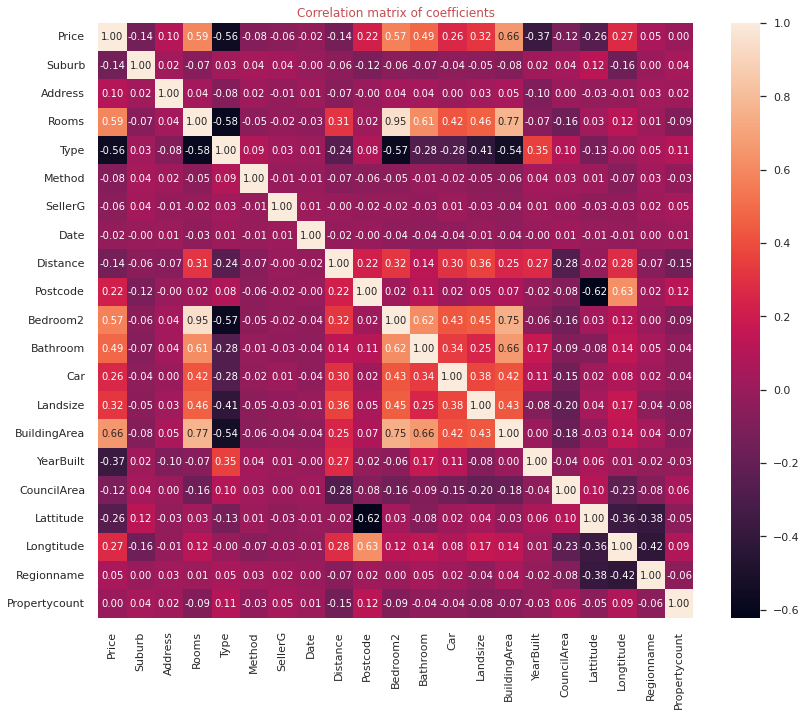

In [20]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1)
cor=df.corr()
sns.heatmap(df.corr(),fmt='.2f', square=True, annot_kws={'size': 10},annot=True)
plt.title('Correlation matrix of coefficients', color='r')
plt.tight_layout()
plt.show()

In [21]:
X=df.drop('Price', axis=1)
y=df['Price']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4337, 20)
(4337,)
(1859, 20)
(1859,)


In [22]:
regressor=LinearRegression()
model=regressor.fit(X_train, y_train)

In [23]:
model.intercept_

772.0344099943112

In [24]:
cor_target=abs(cor["Price"])
relevant_features=cor_target[cor_target>0.5]
print(relevant_features)

Price           1.000000
Rooms           0.592389
Type            0.562952
Bedroom2        0.570993
BuildingArea    0.657430
Name: Price, dtype: float64


In [25]:
lr=LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 51.3 ms, sys: 1.89 ms, total: 53.2 ms
Wall time: 28.8 ms


0.7975148131465116

In [26]:
y_pred = lr.predict(X_test)
print(y_pred)

[ 904.34726138  452.78533275  847.02251101 ...  121.90508042 1015.86250292
  713.22089852]


In [27]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))

Mean Absolute Error :  145.55
Mean Squared Error :  33717.01
Root Mean Squared Error :  12.064410470470573


In [28]:
y_pred=regressor.predict(X_test)
df_fitted=pd.DataFrame({'Price (Actual)': y_test, 'Price (Predicted)':y_pred})
print(df_fitted.head())

       Price (Actual)  Price (Predicted)
4850              620         904.347261
2307              427         452.785333
10090             775         847.022511
3645             1039         965.818605
4930              512         508.893446


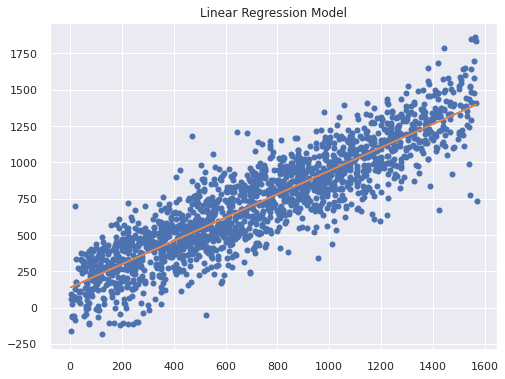

In [29]:
x = y_test
y = y_pred

plt.figure(figsize = (8,6))
plt.title("Linear Regression Model")
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b)

/tmp/ipykernel_7392/1713473104.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], color='darkorange')


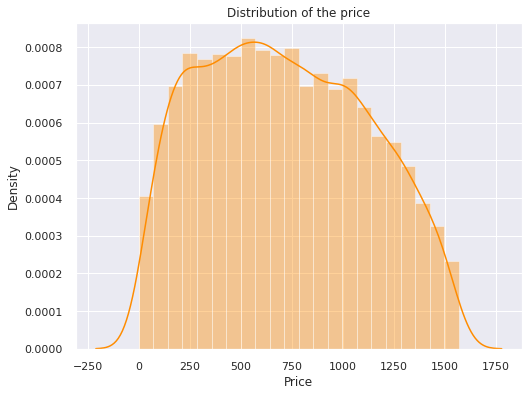

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(df['Price'], color='darkorange')
plt.title("Distribution of the price")
plt.show()

/tmp/ipykernel_7392/189444169.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Price'] ,shade=True)


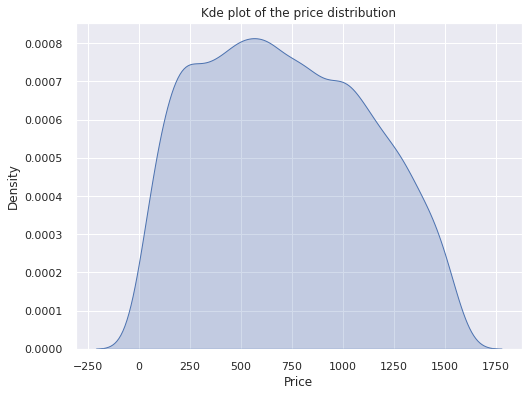

In [31]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df['Price'] ,shade=True)
plt.title("Kde plot of the price distribution")
plt.show()

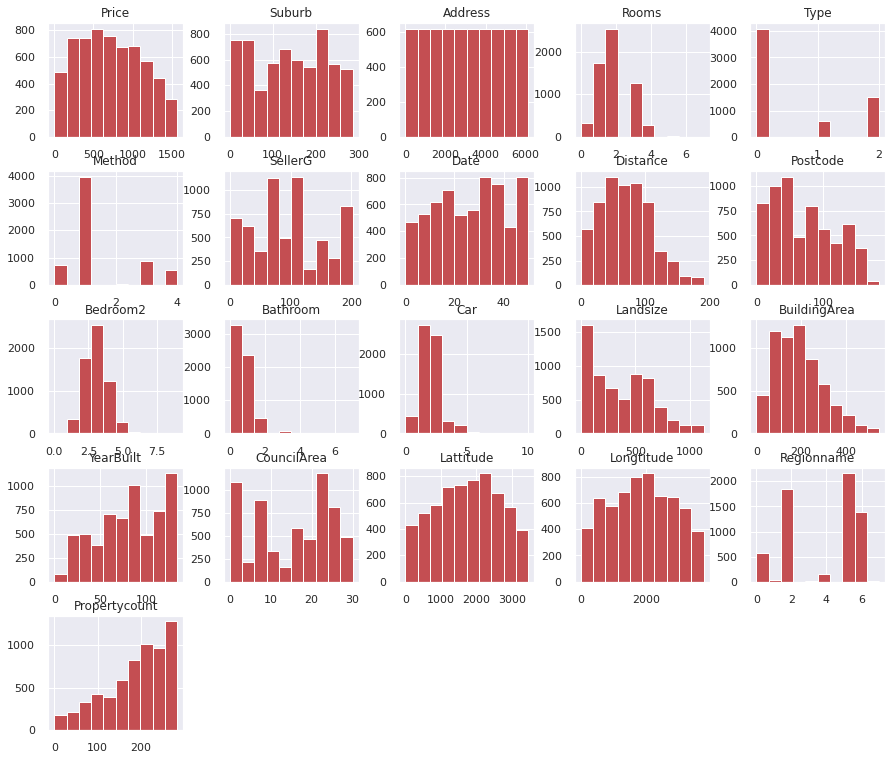

In [32]:
df.hist(figsize = (15,13), color = 'r')
plt.show()

In [33]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())
# make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):               10890.539
Model:                            OLS   Adj. R-squared (uncentered):          10940.989
Method:                 Least Squares   F-statistic:                             -215.9
Date:                Sat, 08 Apr 2023   Prob (F-statistic):                        1.00
Time:                        15:05:12   Log-Likelihood:                         -29062.
No. Observations:                4337   AIC:                                  5.816e+04
Df Residuals:                    4317   BIC:                                  5.829e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------